# Exploratory Data Analysis and Feature Selection

Performing EDA on SpaceX launch data with pandas, matplotlib

In [1]:
# load python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
### load SpaceX data into a dataframe

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


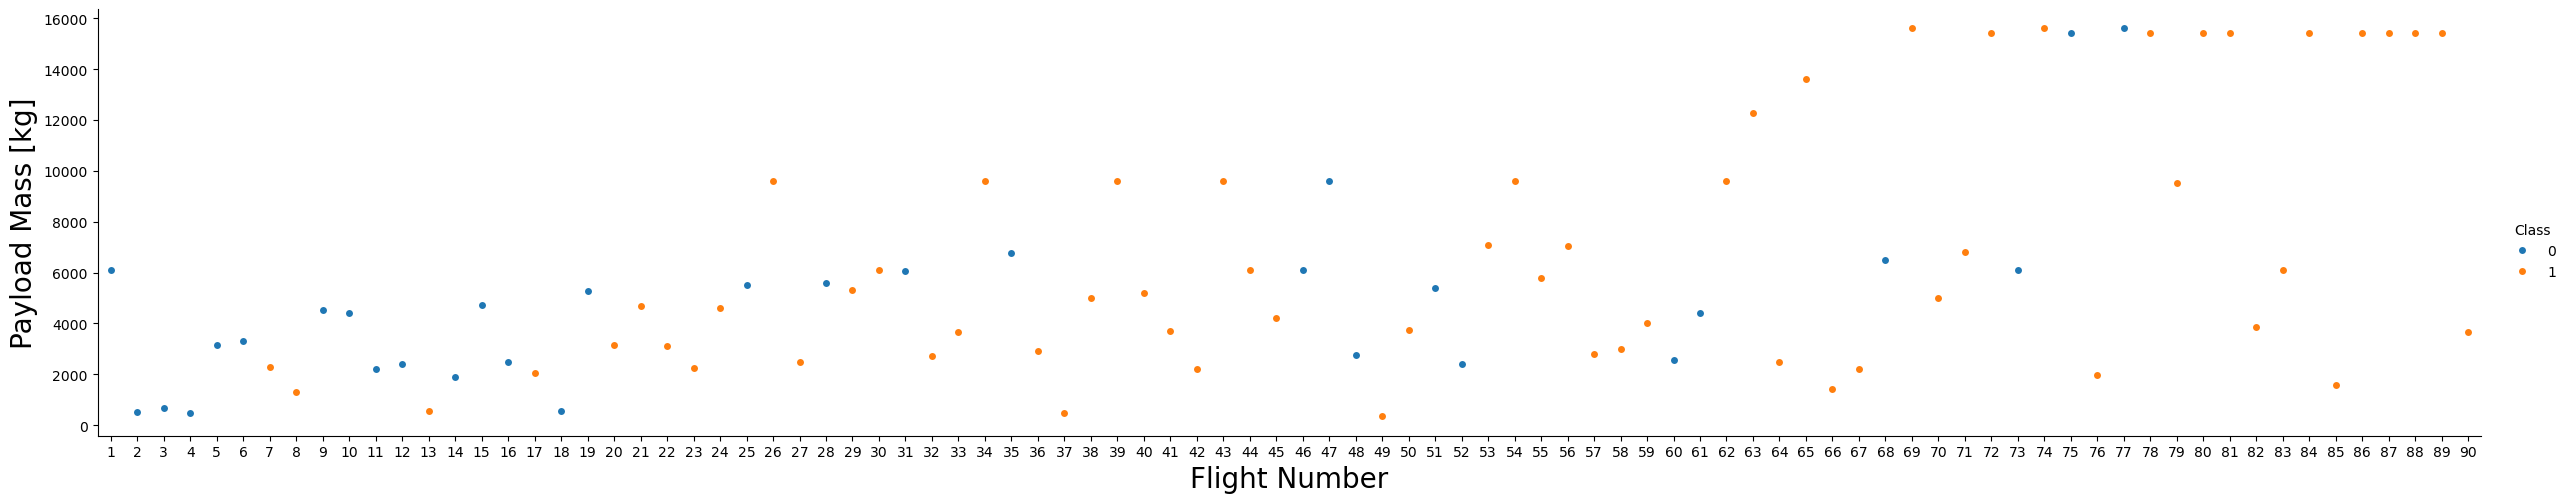

In [3]:
### take a look at flight number (consecutive) vs payload mass with launch outcome (class)

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass [kg]", fontsize=20)
plt.show()

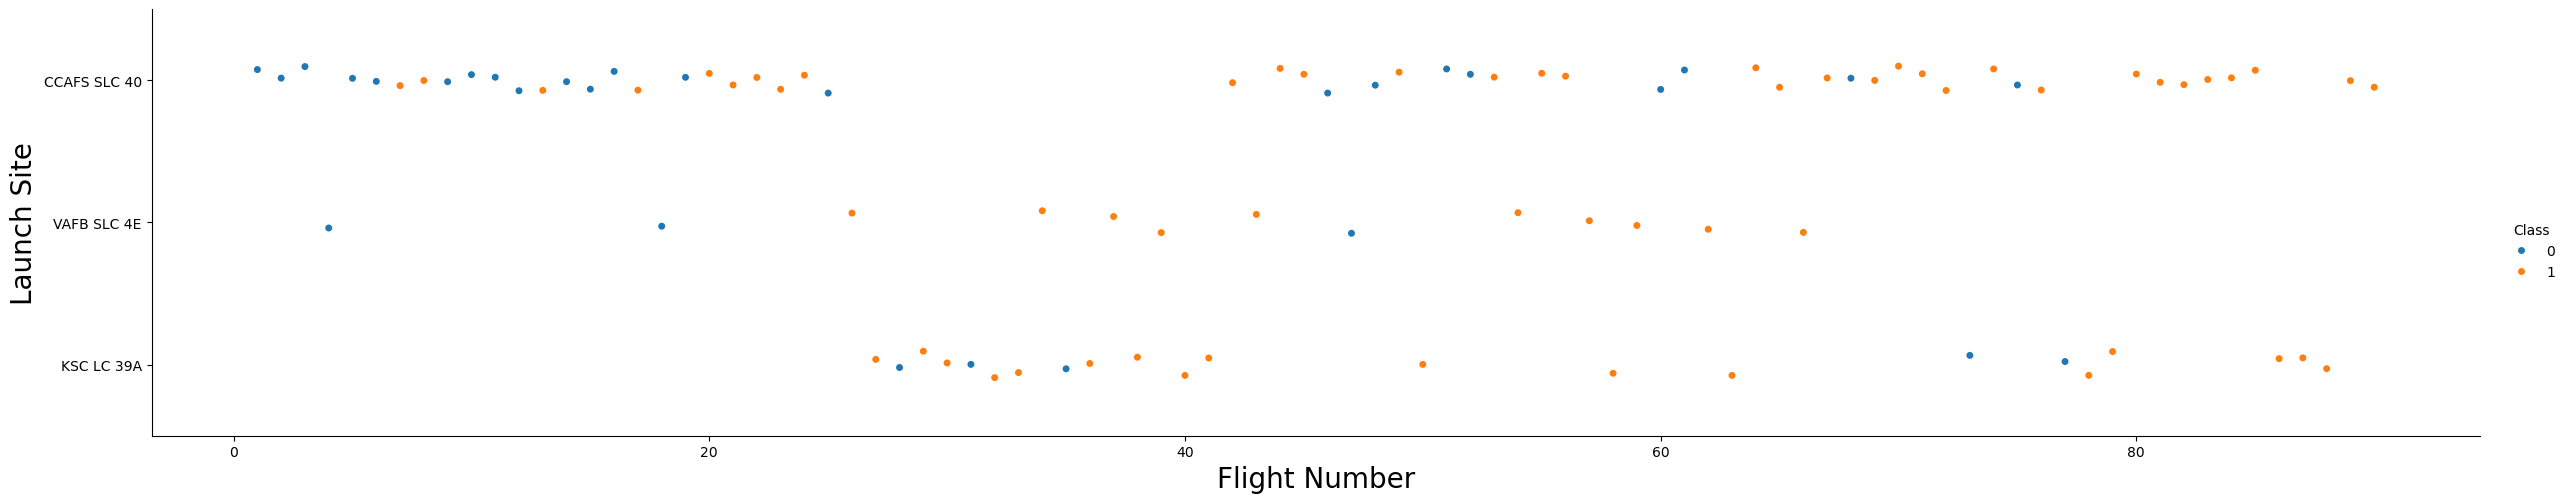

In [4]:
### generally appears that the rate of success has increased over time, with a great track record recently

### take a look at flight number vs launch site with outcomes

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

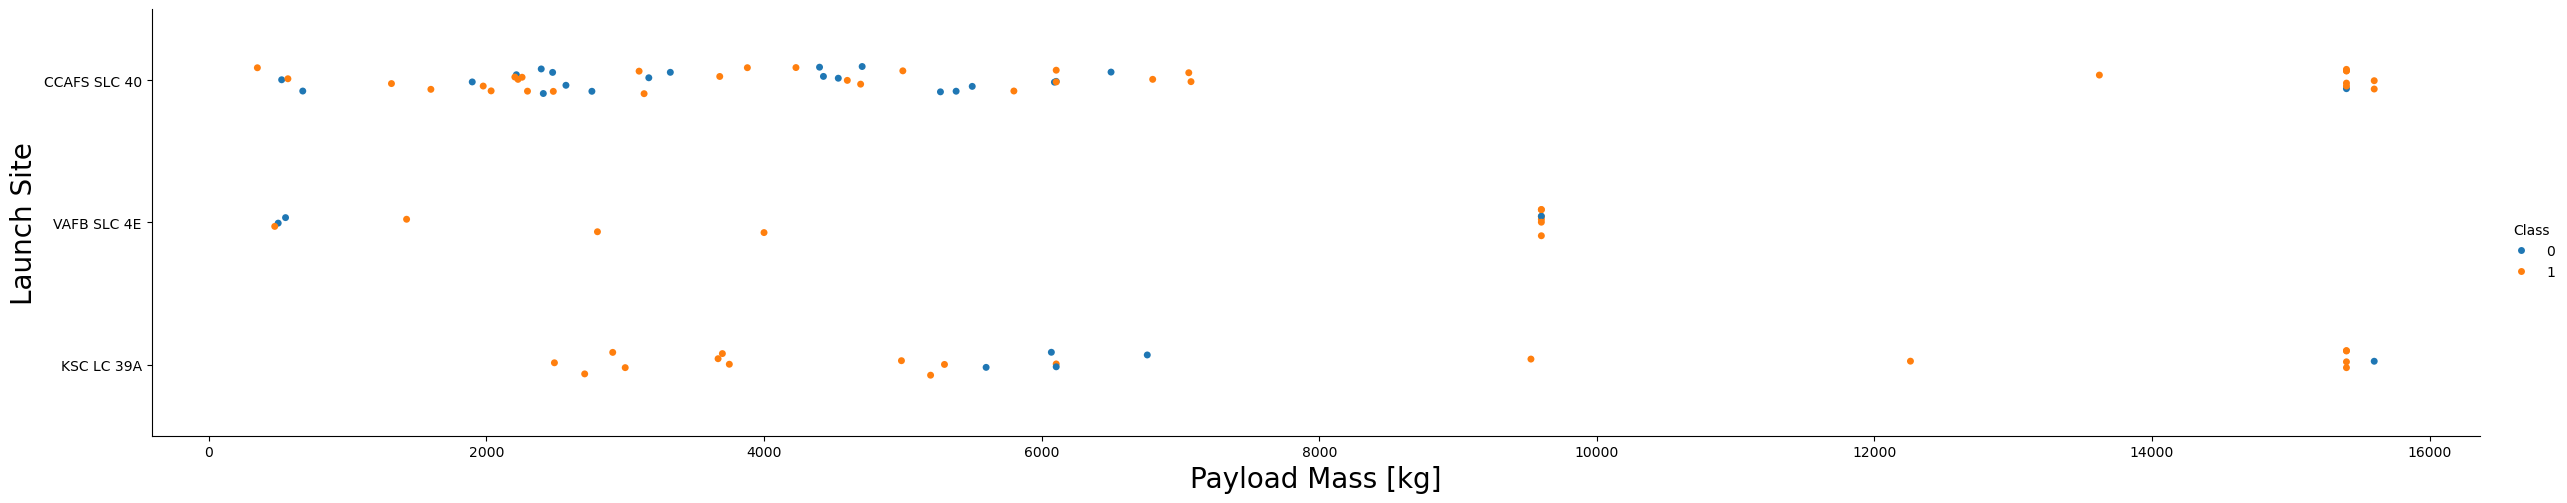

In [5]:
### Looks like they only use other facilities when Cape Canaveral isn't available for some reason

### How do launch sites relate to the payload mass?
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass [kg]", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

<Axes: xlabel='Orbit', ylabel='Class'>

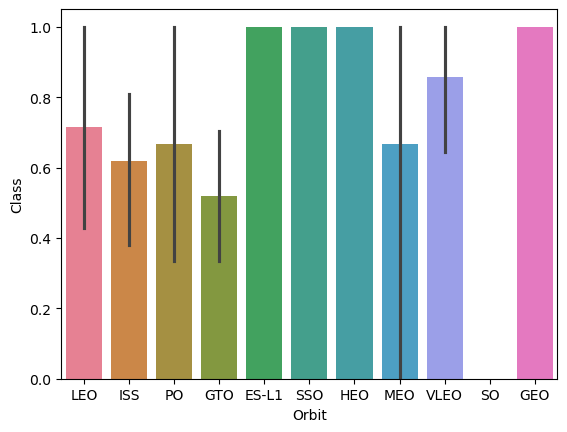

In [6]:
### Looks like the airforce base doesn't work for payloads greater than ~10000kg

### Now, I want to see if there's any relationship between success (class) and the type of orbit being launched to
sns.barplot(x="Orbit", y="Class", hue="Orbit", data=df)

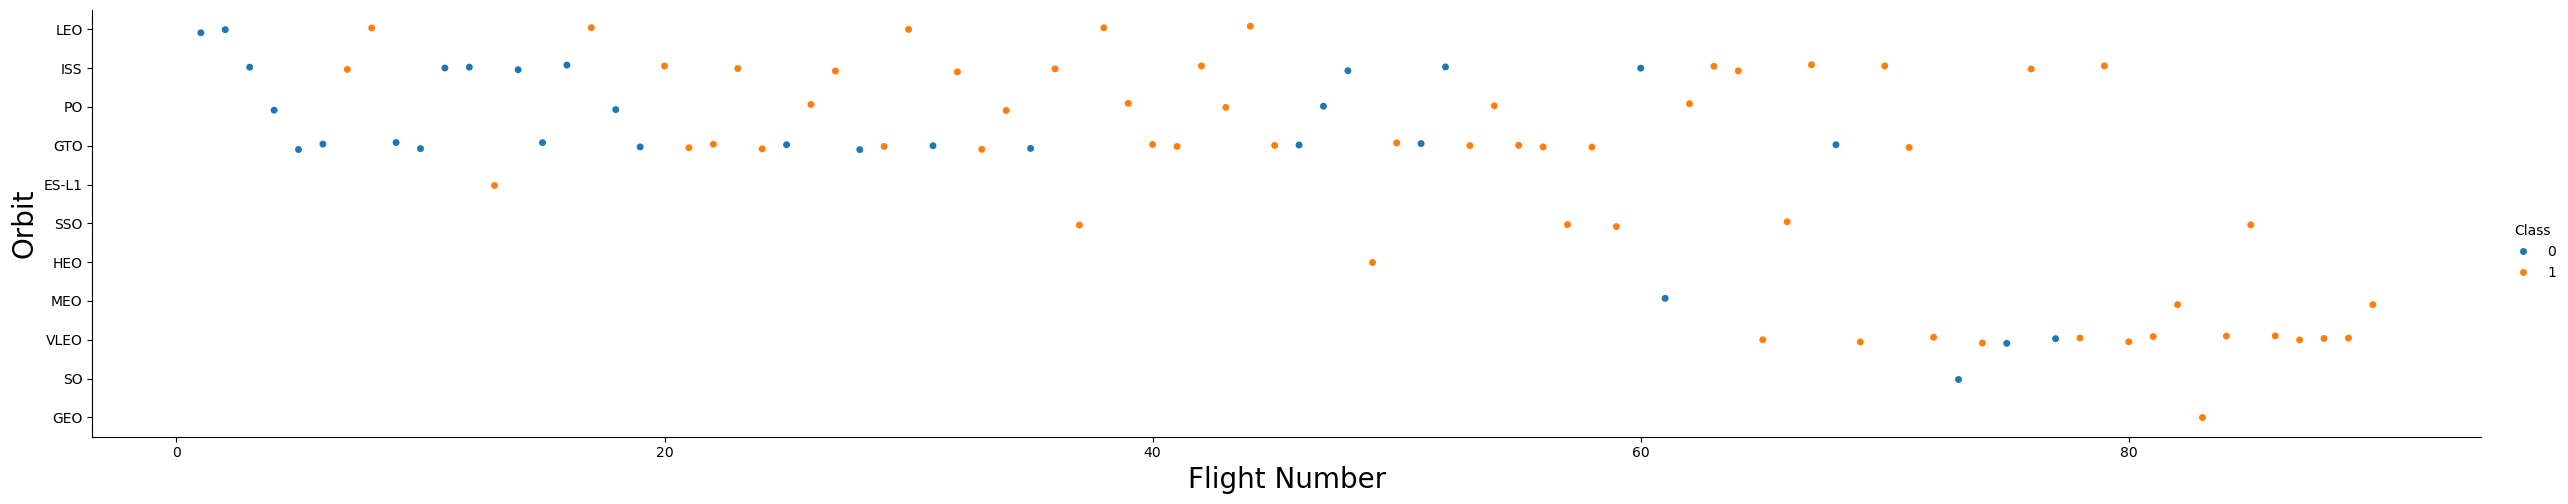

In [7]:
### The highest success rates possible for ES-L1, SSO, HEO, and GEO orbits

### Now, check the relationship between FlightNumber and Orbit
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

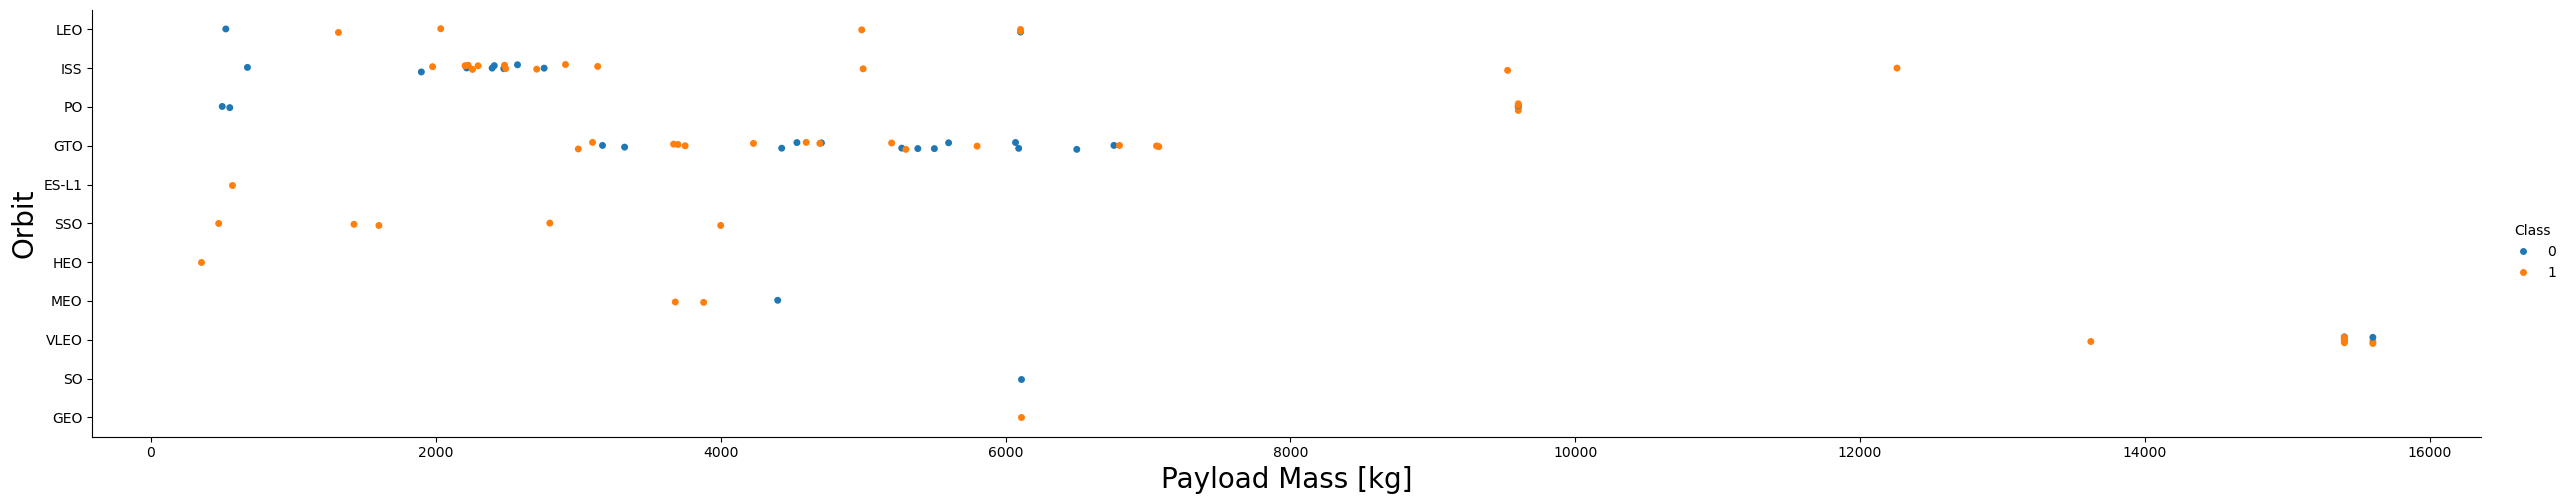

In [8]:
### Some orbits have improved success with time, but others (ex. GTO) seem to be challenging overall

### Look at payload mass vs orbit to see any relation there
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass [kg]", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

In [9]:
### take a look at the landing success rate with respect to time
### first, change dates to the year only

year = []
def getyear():
    for i in df["Date"]: year.append(i.split("-")[0])
    return year
getyear()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


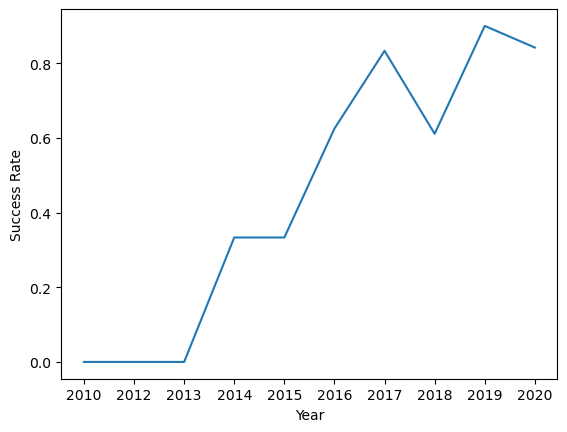

In [10]:
rates = df.groupby(['Date'], as_index=False).mean(['Class'])

plt.plot(rates['Date'],rates['Class'])
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()

In [11]:
### the success rate increased until 2017, with some stochasticity since then

## Feature Selection and Encoding

In [12]:
### choose features that likely have an impact on success rate

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [22]:
### for regression purposes, apply one-hot encoding to categorical features Orbits, LaunchSite, LandingPad, and Serial
### NOTE: pandas get_dummies() uses True/False rather than 0/1

features_one_hot = pd.get_dummies(data=features, columns=['Orbit','LaunchSite','LandingPad','Serial'], prefix=['Orbit','Launch','Landing','Serial'])


In [23]:
# cast the whole dataframe to float64 for regression and save to csv

features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [25]:
len(features_one_hot.columns)

80